#**Actividad: DASHboards y Plotly**


Iker Villalobos Gilling                   | A01710453

Juan Carlos Cárcamo Alarcón       | A01710253

José David Castillo Jasso              | A01710953

Ana Isabel García Mojica             | A01706241


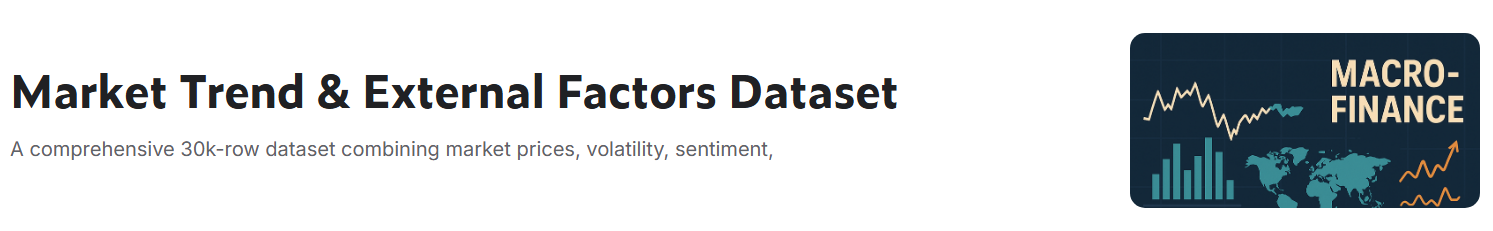

**Link dataset:** https://www.kaggle.com/datasets/kundanbedmutha/market-trend-and-external-factors-dataset

**Diccionario:**

Date: Business trading day.

Open_Price: Price at market open.

Close_Price: Price at market close.

High_Price: Highest intraday price.

Low_Price: Lowest intraday price.

Volume: Shares traded that day.

Daily_Return_Pct: Percentage change from previous close.

Volatility_Range: High Low intraday variation.

VIX_Close: Synthetic VIX Index value (fear/volatility measure).

Economic_News_Flag: 1 if CPI, GDP, Jobs report, or other macro release occurred.

Sentiment_Score: Daily aggregated sentiment from −1 (negative) to +1 (positive).

Federal_Rate_Change_Flag: 1 if the central bank announced a rate change.

GeoPolitical_Risk_Score: 0–100 score representing global geopolitical tension.

Currency_Index: Synthetic USD-like currency index (80–120).

#Gráficas

###**Paleta de colores**

In [ ]:
principales = ["#14283B", "#EED2A8", "#3C8990", "#409FA4", "#3B939C", "#285C6C"]
complementarios = ["#14283B", "#3b2714"]
monocromaticos = ["#000000", "#0a1016", "#111a24", "#132333", "#223548", "#3d5065", "#5a6c82", "#788aa1"]
complementarios_divididos = ["#14283b", "#2f143b", "#383b14"]
analogos = ["#14283b", "#14143b", "#143b3b"]
triada = ["#14283b", "#3b1428", "#283b14"]

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


df = pd.read_csv("Market_Trend_External.csv")
df.head()

Date  Open_Price  Close_Price  High_Price  Low_Price    Volume  \
0  1902-09-08      100.00       100.50      100.63      99.35   2334489   
1  1902-09-09      100.50       102.02      102.30      99.49  10626850   
2  1902-09-10      102.02       101.55      102.56     101.09   9884633   
3  1902-09-11      101.55       101.08      104.16     100.13   9405648   
4  1902-09-12      101.08        98.65      101.69      98.39   5247581   

   Daily_Return_Pct  Volatility_Range  VIX_Close  Economic_News_Flag  \
0            0.0000              1.28      31.44                   0   
1            1.5124              2.81      27.99                   1   
2           -0.4607              1.47      21.27                   1   
3           -0.4628              4.03      48.86                   1   
4           -2.4040              3.30      15.78                   1   

   Sentiment_Score  Federal_Rate_Change_Flag  GeoPolitical_Risk_Score  \
0           -0.413                         0                    61.60   
1           -0.384                         1                    69.49   
2            0.591                         0                    67.41   
3            0.599                         1                    50.91   
4           -0.081                         1                    23.00   

   Currency_Index  
0           98.88  
1           93.43  
2           84.25  
3           87.78  
4           82.11

In [ ]:
df.columns

Index(['Date', 'Open_Price', 'Close_Price', 'High_Price', 'Low_Price',
       'Volume', 'Daily_Return_Pct', 'Volatility_Range', 'VIX_Close',
       'Economic_News_Flag', 'Sentiment_Score', 'Federal_Rate_Change_Flag',
       'GeoPolitical_Risk_Score', 'Currency_Index'],
      dtype='object')

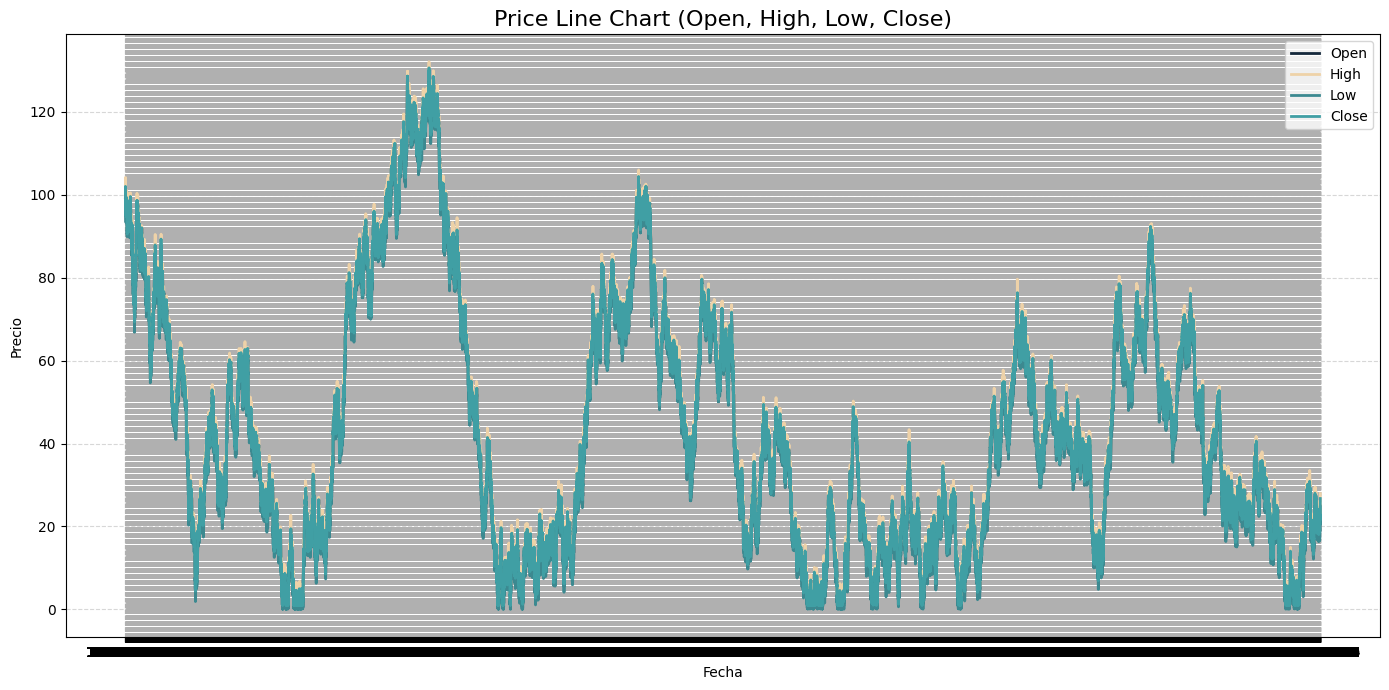

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Graficar cada serie con su color
plt.plot(df['Date'], df['Open_Price'],  label="Open",  color=principales[0],  linewidth=2)
plt.plot(df['Date'], df['High_Price'],  label="High",  color=principales[1],  linewidth=2)
plt.plot(df['Date'], df['Low_Price'],   label="Low",   color=principales[2],   linewidth=2)
plt.plot(df['Date'], df['Close_Price'], label="Close", color=principales[3], linewidth=2)

# Títulos y estilos
plt.title("Price Line Chart (Open, High, Low, Close)", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

En esta primera gráfica se visualizan los ciclos económicos de largo plazo, identificando periodos de tendencia alcista y bajistas. Debido a la escala temporal extensa, las líneas de los cuatro indicadores tienden a superponerse, lo que indica que la variación intradía (diferencia entre High y Low) es marginal comparada con la tendencia histórica acumulada.

In [ ]:
import plotly.express as px

g1 = px.scatter(
    df,
    x="Volatility_Range",
    y="Daily_Return_Pct",
    color="Volatility_Range",
    title="Volatilidad vs. Retorno Diario",
    color_continuous_scale=principales,
    marginal_y="rug",
    marginal_x="histogram",
    hover_data=['Date', 'Close_Price']
)
g1.show()
#Mediante esta gráfica podemos ver si los días con una mayor volatilidad intradía tienen unos retornos diários más fuertes. Se puede ver que la mayor concentración de registros están en la parte central de la gráfica.

En este gráfico, se observa un comportamiento de heterocedasticidad. Cuando la volatilidad es baja (0-2), los retornos se mantienen más estables y cercanos a cero, y a medida que la volatilidad aumenta, la dispersión de los retornos crece drásticamente, Esto no dice que para obtener retornos altos (superiores al 100% en el eje Y), el mercado suele atravesar periodos de alta inestabilidad.

El histograma superior revela que la gran mayoría de los días operados tienen una volatilidad baja (ligero sesgo a la derecha).

El gráfico 'rug' (marcas laterales) en el eje Y nos permite ver la densidad de los retornos, mostrando que los días con ganancias extremas son "outliers" o casos atípicos comparados con la concentración principal de datos.

In [ ]:
g2 = px.scatter(
    df,
    x="Volume",
    y="Daily_Return_Pct",
    color="Volume",
    title="Volumen vs. Retorno Diario",
    color_continuous_scale=principales
)
g2.show()
# Mediante esta gráfica nos es posible visualizar si los cambios más grandes en precio están ligados a un mayor volumen de acciones negociadas ese día, se puede ver que se mantienen estables los porcentajes de retorno diario.

Se observa una concentración de datos en la zona izquierda (volúmenes bajos a medios). Curiosamente, los retornos más extremos (superiores al 200% en el eje Y) tienden a ocurrir en días con volúmenes relativamente menores (0M - 5M).

In [ ]:
g3 = px.scatter(
    df,
    x="VIX_Close",
    y="Daily_Return_Pct",
    color="VIX_Close",
    title="VIX vs. Retorno Diario (con Tendencia)",
    color_continuous_scale=triada,
    trendline="ols"
)
g3.show()
# Esta gráfica nos ayuda a ver si los miedos en el mercado están ligados con retornos negativos de las acciones. Podemos ver que a pesar de el miedo en los mercados, el porcentaje diario de retorno se puede ver estable.

La gráfica confirma que a mayor incertidumbre, mayor es la volatilidad de los rendimientos.
Los retornos diarios confirma un patrón típico de mercados financieros: el nivel de miedo no determina la dirección, pero sí aumenta la magnitud de los movimientos. En niveles elevados de VIX, los retornos se vuelven más dispersos y extremos, lo cual indica condiciones de alta incertidumbre, mayor sensibilidad a noticias y riesgo elevado de eventos de cola.

In [ ]:
g4 = px.scatter(
    df,
    x="Open_Price",
    y="Close_Price",
    color="Close_Price",
    title="Precio apertura vs. Precio cierre",
    color_continuous_scale=principales
)
g4.show()
# Esta gráfica nos muestra la relación de manera diaria entre el precio de apertura y cierre. Se puede ver que los cambios son muy sutiles y por eso puede llegar a parecer una recta.

In [ ]:
g5 = px.scatter(
    df,
    x="Low_Price",
    y="High_Price",
    color="High_Price",
    title="Precio máximo intradía vs. Precio mínimo intradía",
    color_continuous_scale=complementarios_divididos
)
g5.show()
# Nos muestra la comparativa entre el precio más alto del día contra el precio más bajo del día por acción. Se puede ver que los cambios son muy sutiles y por eso puede llegar a parecer una recta.

La correlación mostrada es extremadamente fuerte y positiva. Esto indica que el rango de oscilación diario es consistente: el precio máximo rara vez se desvía drásticamente del mínimo en términos absolutos.

In [ ]:
g6 = px.scatter(
    df,
    x="GeoPolitical_Risk_Score",
    y="Daily_Return_Pct",
    color="GeoPolitical_Risk_Score",
    title="Riesgo Geopolítico vs. Retorno Diario",
    color_continuous_scale=principales
)
g6.show()
# Mediante esta gráfica podemos analizar si las situaciones geopolíticas o globales tienen un efecto negativo en los retornos de las acciones. Podemos ver que aún con los diferentes scores de riesgo geopolítico sigue habiendo una estabilidad en el porcentaje de retorno diario.

A diferencia de las gráficas de precios, aquí no se observa una tendencia lineal clara. La nube de puntos es dispersa y horizontal. Esto nos indica que el retorno diario no depende linealmente del nivel de riesgo geopolítico. Observamos retornos extremos (superiores al 100%) tanto en niveles de riesgo bajo (0-20) como en niveles altos (>80).

In [ ]:
g7 = px.scatter(
    df,
    x="GeoPolitical_Risk_Score",
    y="Volume",
    color="Volume",
    title="Riesgo Geopolítico vs. Volumen",
    color_continuous_scale=complementarios_divididos
)
g7.show()
# Esta gráfica nos permite ver si los riesgos geopolíticos tienen un efecto en el volumen de acciones negociadas de manera diaria. Como podemos ver, con todos los diferentes socres de riesgo geopolítico, sigue habiendo mucho volumen de transacciones

Esta gráfica no dice que la distribución de los datos es rectangular y uniforme. No importa si el riesgo geopolítico es bajo (0) o extremo (100), el volumen de acciones negociadas se mantiene constante en todo el rango (desde 0 hasta 20M).

In [ ]:
g8 = px.scatter(
    df,
    x="Currency_Index",
    y="Volume",
    color="Volume",
    title="Tipo de cambio vs. Volumen",
    color_continuous_scale=monocromaticos
)
g8.show()
#Esta gráfica nos permite analizar si la variación en el score del tipo de cambio está ligado a un menor o mayor volumen de transacciones. Podemos ver que con el score que sea (va de un rango de 80-120), hay una estabilidad en transacciones realizadas.

Al igual que en la gráfica pasada, esta gráfica nos muestra que no importa si el tipo de cambio es bajo (0) o extremo (100), el volumen de acciones negociadas se mantiene constante en todo el rango (desde 0 hasta 20M).

In [ ]:
g9 = px.scatter(
    df,
    x="Sentiment_Score",
    y="Daily_Return_Pct",
    color="Sentiment_Score",
    title="Sentiment Score vs. Retorno Diario",
    color_continuous_scale=principales
)
g9.show()
# Esta gráfica nos da la oportunidad de ver si los días con un mejor sentimiento con respecto a factores económicos, hay un retorno diario más elevado, se puede ver que está balanceado y es una gráfica relativamente simétrica.

En este caso, la visualización correlaciona el impacto agregado de las noticias y redes sociales (Sentiment Score de -1 a +1) con el rendimiento diario. La distribución de los datos muestra una dispersión horizontal sin una pendiente agresiva. Esto sugiere que el sentimiento público no es un predictor lineal inmediato del precio. Encontramos días con sentimiento muy positivo (cercano a +1) que tuvieron retornos nulos o negativos, y viceversa.